##### Linear Regression

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

##### Loading dataset

In [2]:
df = pd.read_csv("TV_Sales.csv")
df.head()

,TV,Sales
0,16.0,54.732757
1,13.0,46.677897
2,41.0,150.177829
3,83.0,298.246340
4,15.0,56.594181


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      4562 non-null   float64
 1   Sales   4566 non-null   float64
dtypes: float64(2)
memory usage: 71.6 KB


##### Null values

In [4]:
df.isnull().mean()*100

TV       0.218723
Sales    0.131234
dtype: float64

In [5]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4567    False
4568    False
4569    False
4570    False
4571    False
Length: 4572, dtype: bool

In [6]:
df.dropna(inplace=True)

In [7]:
df.isnull().mean()*100

TV       0.0
Sales    0.0
dtype: float64

##### Selecting the features, one column

In [8]:
x= df[["TV"]].values
x

array([[16.],
       [13.],
       [41.],
       ...,
       [44.],
       [71.],
       [42.]])

##### Selecting the Target Column

In [9]:
y = df[["Sales"]].values

In [10]:
sc = StandardScaler()

In [11]:
x = sc.fit_transform(x)

In [12]:
x

array([[-1.45775911],
       [-1.57263965],
       [-0.50042125],
       ...,
       [-0.38554071],
       [ 0.64838417],
       [-0.46212774]])

In [13]:
y

array([[ 54.73275715],
       [ 46.67789698],
       [150.1778288 ],
       ...,
       [163.6314574 ],
       [253.6104113 ],
       [148.2024141 ]])

##### Splitting into training and testing data

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

#### Model building

In [15]:
model = LinearRegression()

#### Fitting the model

In [16]:
model.fit(x_train, y_train)

LinearRegression()

#### Coefficient

In [17]:
model.coef_

array([[92.9890112]])

#### Intercept

In [18]:
model.intercept_

array([192.43260955])

##### Training Accuracy

In [19]:
training_score= model.score(x_train, y_train)*100
training_score

99.89945329945171

#### Testing score

In [20]:
testing_score= model.score(x_test, y_test)*100
testing_score

99.89974160292293

#### R2 score

In [21]:
R2_score = r2_score(y_test, model.predict(x_test))*100
R2_score

99.89974160292293

#### Mean Absolute Error

In [22]:
mae = mean_absolute_error(y_test, model.predict(x_test))
mae

2.363243117039462

#### Mean Squared error

In [23]:
mse = mean_squared_error(y_test, model.predict(x_test))
mse

8.610468010474161

#### Predicting the values

In [24]:
y_pred = model.predict(x)
y_pred

array([[ 56.87703178],
       [ 46.19440377],
       [145.89893187],
       ...,
       [156.58155988],
       [252.72521198],
       [149.45980788]])

#### Dataframe with actual value and predicted value to compare them

In [25]:
OUTPUT= pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTED"), dtype=float)
OUTPUT.head()

,ACTUAL,PREDICTED
0,54.732757,56.877032
1,46.677897,46.194404
2,150.177829,145.898932
3,298.246340,295.455724
4,56.594181,53.316156


#### Visualising the Output

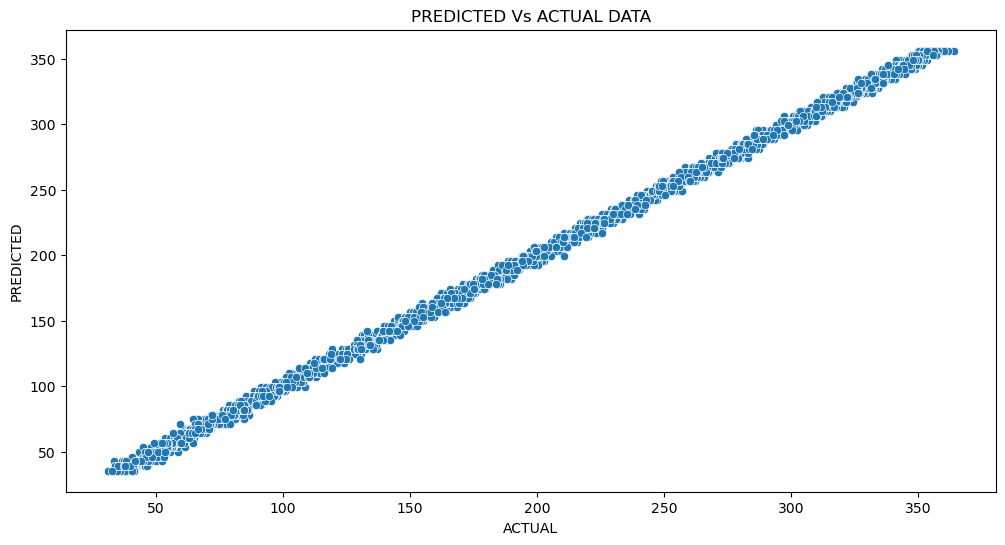

In [26]:
plt.figure(figsize=(12,6))
plt.title("PREDICTED Vs ACTUAL DATA")
plt.xticks()
sns.scatterplot(data=OUTPUT, x="ACTUAL", y = "PREDICTED");

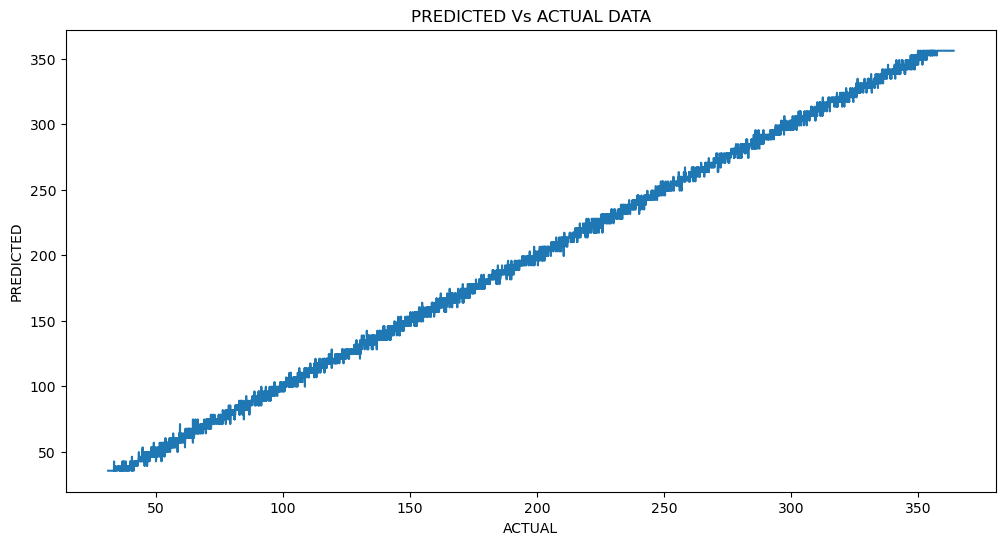

In [27]:
plt.figure(figsize=(12,6))
plt.title("PREDICTED Vs ACTUAL DATA")
sns.lineplot(data=OUTPUT, x="ACTUAL", y = "PREDICTED");

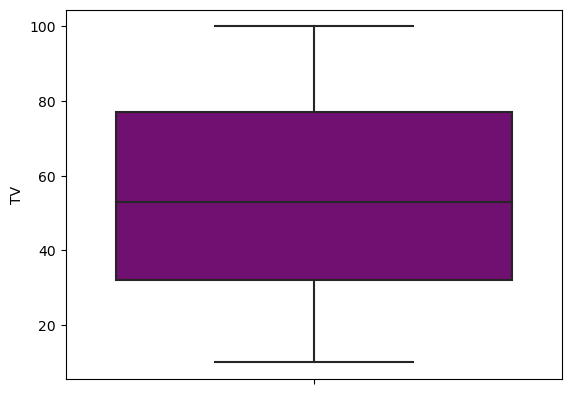

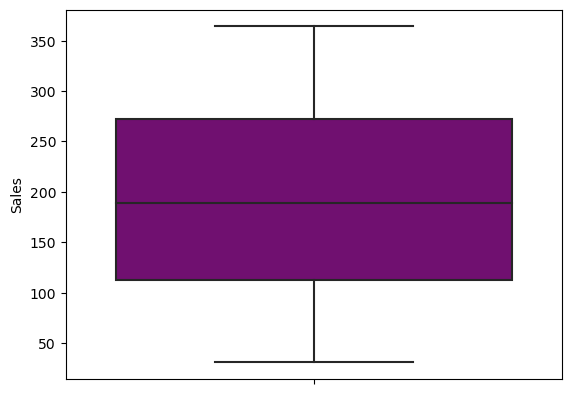

In [30]:
for i in df.columns:
    if df[i].dtype !="object":
        sns.boxplot(y=df[i], color="purple")
        plt.show();